In [1]:
import os                           # for testing use only
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA 
%matplotlib inline

## Read dataset

In [2]:
shein_df = pd.read_csv('shein_df_final.csv')

In [3]:
shein_df.head()

,Color,Style,Pattern Type,Type,Fabric,Material,Care Instructions,rating,price,category,...,Spandex,Cotton,Metallized Fibres,Polyamide,Rayon,Silk,Nylon,Cashmere,Linen,Polyurethane
0,Light Grey,Elegant,Plain,Bodycon,Slight Stretch,Fabric,Hand wash or professional dry clean,4.91,39.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mint Green,Boho,"Plants, All Over Print",Shirt,Non-Stretch,Fabric,Machine wash or professional dry clean,4.90,79.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,White,Boho,Floral,A Line,Slight Stretch,Woven Fabric,Machine wash or professional dry clean,4.89,79.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Black,Elegant,Plain,A Line,Non-Stretch,Fabric,"Hand wash,do not dry clean",4.94,119.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Black,Elegant,Plain,Bodycon,Slight Stretch,Flannelette,Machine wash or professional dry clean,4.94,49.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Eda

In [4]:
shein_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Color              4425 non-null   object 
 1   Style              4425 non-null   object 
 2   Pattern Type       4425 non-null   object 
 3   Type               4425 non-null   object 
 4   Fabric             4425 non-null   object 
 5   Material           4425 non-null   object 
 6   Care Instructions  4425 non-null   object 
 7   rating             4425 non-null   float64
 8   price              4425 non-null   float64
 9   category           4425 non-null   object 
 10  Polyester          4425 non-null   float64
 11  Elastane           4425 non-null   float64
 12  Viscose            4425 non-null   float64
 13  Spandex            4425 non-null   float64
 14  Cotton             4425 non-null   float64
 15  Metallized Fibres  4425 non-null   float64
 16  Polyamide          4425 

In [5]:
shein_df.describe()

,rating,price,Polyester,Elastane,Viscose,Spandex,Cotton,Metallized Fibres,Polyamide,Rayon,Silk,Nylon,Cashmere,Linen,Polyurethane
count,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000
mean,3.781110,54.622540,82.420475,2.622576,5.254056,0.334079,5.587345,0.145085,2.415548,0.846124,0.004068,0.116859,0.022599,0.061695,0.169492
std,2.043056,31.612969,32.331380,3.863958,18.926545,1.510923,21.466980,1.917539,13.910979,7.527658,0.136083,3.099772,1.503292,1.404764,3.902429
min,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.540000,39.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.880000,49.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.940000,69.000000,100.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,349.000000,100.000000,100.000000,100.000000,35.000000,100.000000,43.000000,100.000000,100.000000,5.000000,100.000000,100.000000,49.000000,100.000000


Text(0.5, 1.0, 'Care Instructions')

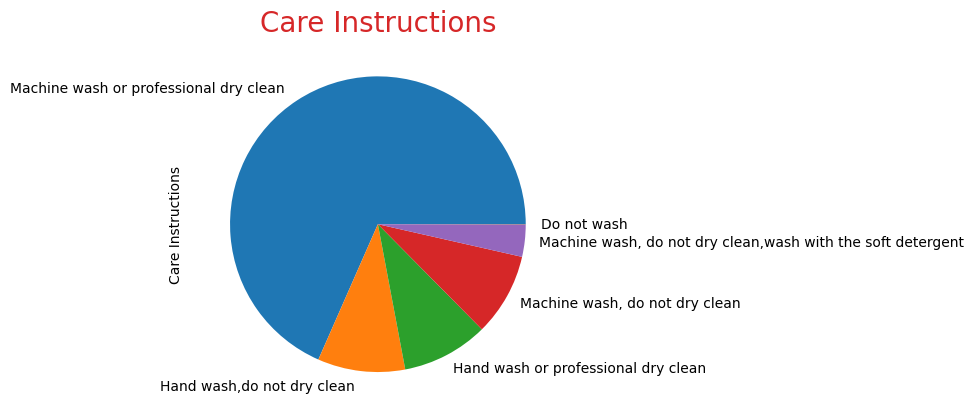

In [6]:
mycolors = ['#002856','#5F9EA0', '#ADD8E6','#40E0D0','#1f77b4','#0000ff','#6495ED','#00BFFF','#20B2AA','#B0C4DE','#48D1CC']
shein_df['Care Instructions'].value_counts().plot(kind= 'pie')
plt.title('Care Instructions', fontsize = 20, color = '#d62728')

Text(0.5, 1.0, 'Fabric')

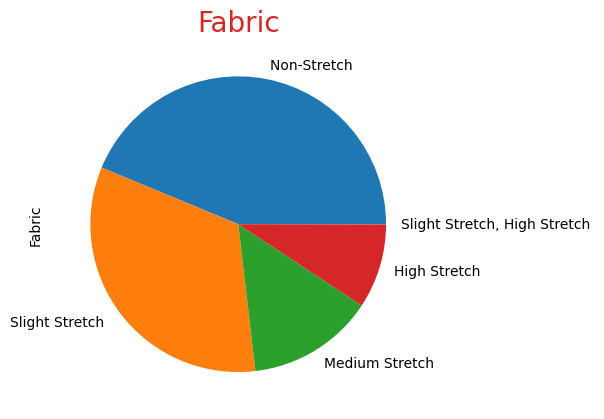

In [7]:
shein_df['Fabric'].value_counts().plot(kind= 'pie')
plt.title('Fabric', fontsize = 20, color = '#d62728')

Text(0.5, 1.0, 'Style')

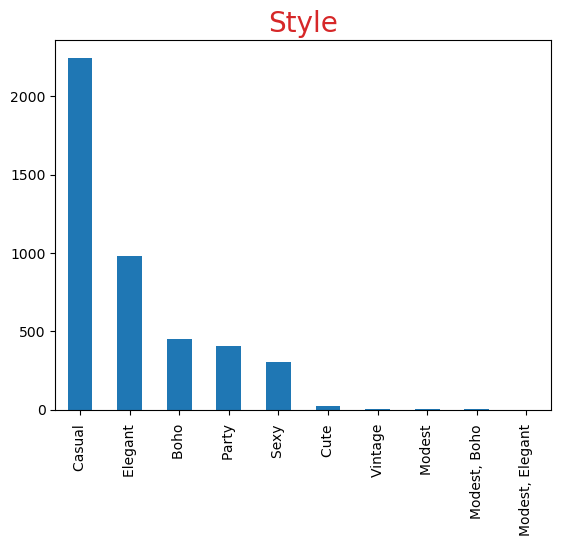

In [8]:
shein_df.Style.value_counts().plot(kind='bar')
plt.title('Style', fontsize = 20, color = '#d62728')

Text(0.5, 1.0, 'Material')

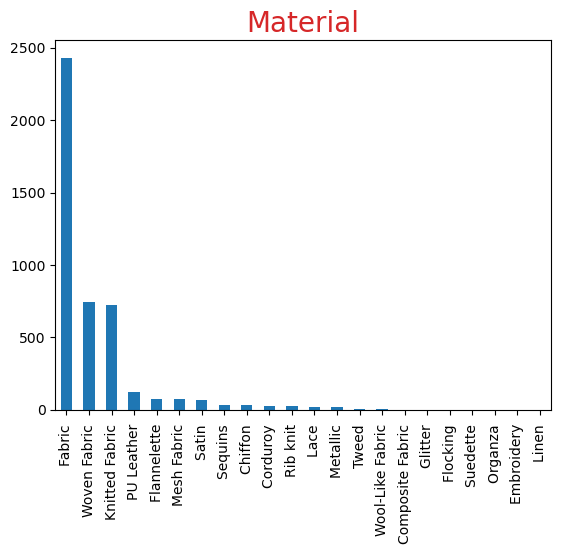

In [9]:
shein_df.Material.value_counts().plot(kind='bar')
plt.title('Material', fontsize = 20, color = '#d62728')

Text(0.5, 1.0, 'price')

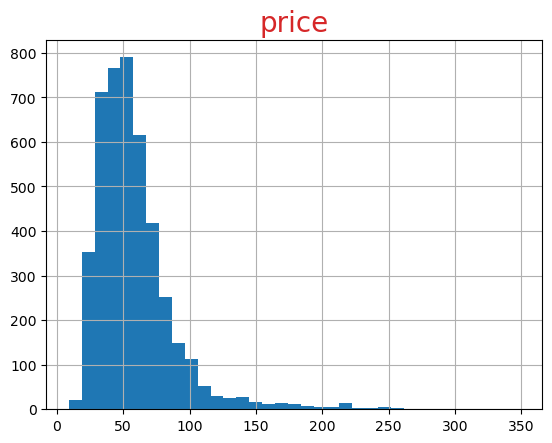

In [10]:
shein_df.price.hist(bins=35)
plt.title('price', fontsize = 20, color = '#d62728')

Text(0.5, 1.0, 'Top ten colors')

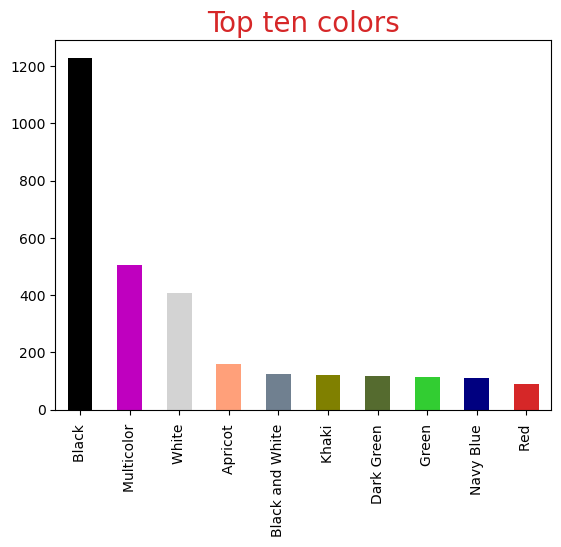

In [11]:
newcolors = ['#000000','#bf00bf','#D3D3D3','#FFA07A','#708090','#808000','#556B2F','#32CD32','#000080','#d62728']
shein_df.Color.value_counts()[:10].plot(kind='bar',color = newcolors)
plt.title('Top ten colors', fontsize = 20, color = '#d62728')

In [12]:
shein_df.Style.value_counts()

Casual              2247
Elegant              979
Boho                 451
Party                405
Sexy                 305
Cute                  27
Vintage                4
Modest                 3
Modest, Boho           3
Modest, Elegant        1
Name: Style, dtype: int64

In [13]:
shein_df.corr()

,rating,price,Polyester,Elastane,Viscose,Spandex,Cotton,Metallized Fibres,Polyamide,Rayon,Silk,Nylon,Cashmere,Linen,Polyurethane
rating,1.000000,-0.000384,-0.041446,0.021723,0.018724,0.039781,0.018315,0.009909,0.021533,0.004619,0.015886,0.020560,0.008676,0.004095,0.002670
price,-0.000384,1.000000,0.076778,-0.180509,-0.041749,0.100579,-0.050590,-0.016704,-0.003945,-0.023006,-0.008470,0.038355,-0.002674,0.003589,0.020673
Polyester,-0.041446,0.076778,1.000000,-0.168240,-0.550005,0.002666,-0.594090,-0.116453,-0.425067,-0.201701,0.000330,-0.092792,-0.038331,-0.101532,-0.097308
Elastane,0.021723,-0.180509,-0.168240,1.000000,0.074827,-0.150107,-0.041519,0.079970,0.097481,0.000262,-0.020293,-0.019026,-0.010206,-0.029815,-0.029485
Viscose,0.018724,-0.041749,-0.550005,0.074827,1.000000,-0.015422,-0.059373,-0.021009,0.004498,-0.031210,-0.008300,-0.003810,-0.004174,0.102180,-0.012060
Spandex,0.039781,0.100579,0.002666,-0.150107,-0.015422,1.000000,-0.047903,-0.016733,-0.016760,0.067296,-0.006611,0.038325,-0.003325,-0.009713,-0.009605
Cotton,0.018315,-0.050590,-0.594090,-0.041519,-0.059373,-0.047903,1.000000,-0.019697,-0.045096,-0.029262,-0.007782,0.005879,-0.003914,0.011054,-0.011307
Metallized Fibres,0.009909,-0.016704,-0.116453,0.079970,-0.021009,-0.016733,-0.019697,1.000000,0.178038,-0.008506,-0.002262,-0.002853,-0.001138,-0.003324,-0.003287
Polyamide,0.021533,-0.003945,-0.425067,0.097481,0.004498,-0.016760,-0.045096,0.178038,1.000000,0.011602,-0.005192,-0.006548,-0.002611,-0.007628,-0.007543
Rayon,0.004619,-0.023006,-0.201701,0.000262,-0.031210,0.067296,-0.029262,-0.008506,0.011602,1.000000,0.046949,-0.004238,-0.001690,-0.004938,-0.004883


In [14]:
shein_df.head()

,Color,Style,Pattern Type,Type,Fabric,Material,Care Instructions,rating,price,category,...,Spandex,Cotton,Metallized Fibres,Polyamide,Rayon,Silk,Nylon,Cashmere,Linen,Polyurethane
0,Light Grey,Elegant,Plain,Bodycon,Slight Stretch,Fabric,Hand wash or professional dry clean,4.91,39.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mint Green,Boho,"Plants, All Over Print",Shirt,Non-Stretch,Fabric,Machine wash or professional dry clean,4.90,79.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,White,Boho,Floral,A Line,Slight Stretch,Woven Fabric,Machine wash or professional dry clean,4.89,79.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Black,Elegant,Plain,A Line,Non-Stretch,Fabric,"Hand wash,do not dry clean",4.94,119.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Black,Elegant,Plain,Bodycon,Slight Stretch,Flannelette,Machine wash or professional dry clean,4.94,49.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

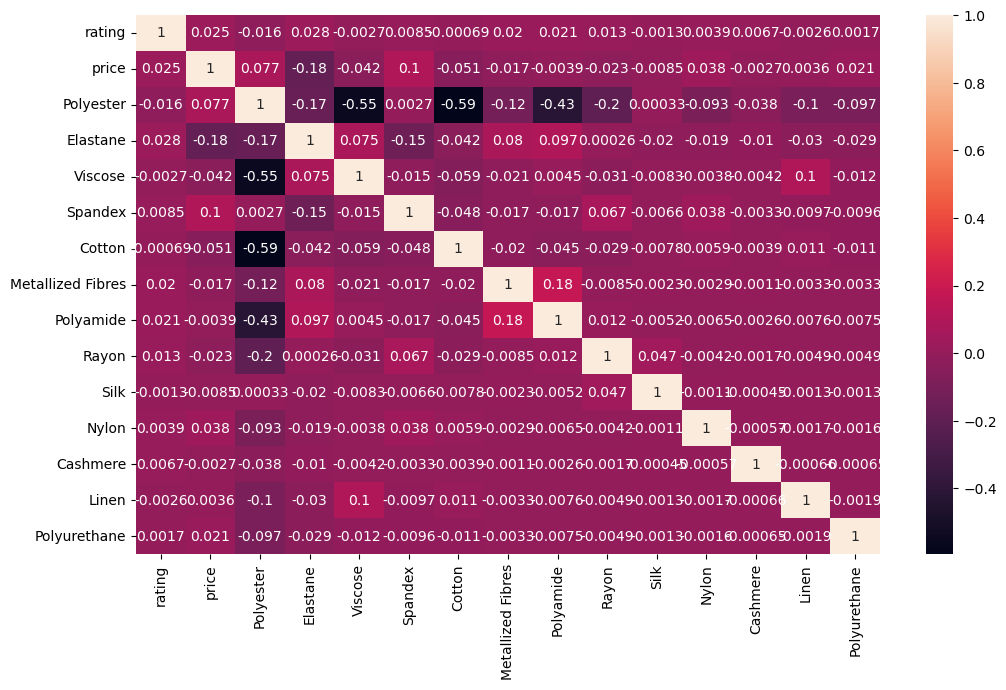

In [38]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(shein_df.corr(),annot=True,ax=ax)

Text(0.5, 1.0, 'Style vs Price')

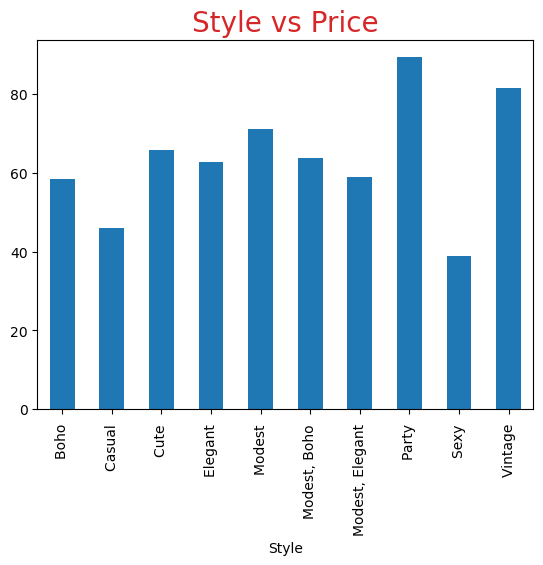

In [16]:
shein_df.groupby('Style')['price'].mean().plot(kind='bar')
plt.title('Style vs Price', fontsize = 20, color = '#d62728')

Text(0.5, 1.0, 'category & Style vs Price')

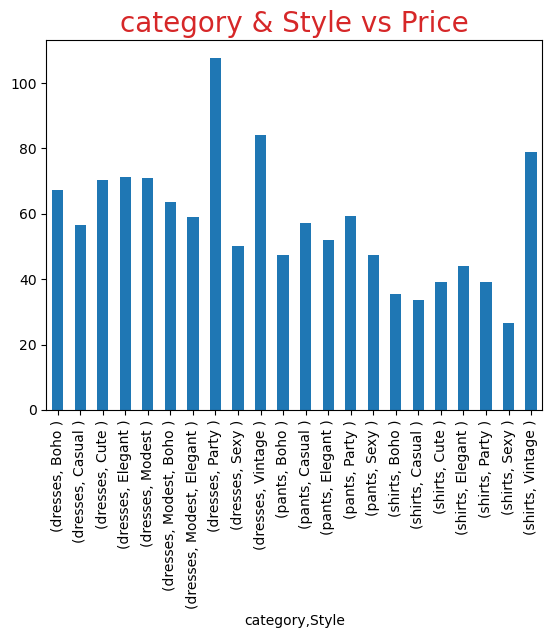

In [17]:
shein_df.groupby(['category','Style'])['price'].mean().plot(kind='bar')
plt.title('category & Style vs Price', fontsize = 20, color = '#d62728')

Text(0, 0.5, 'Style')

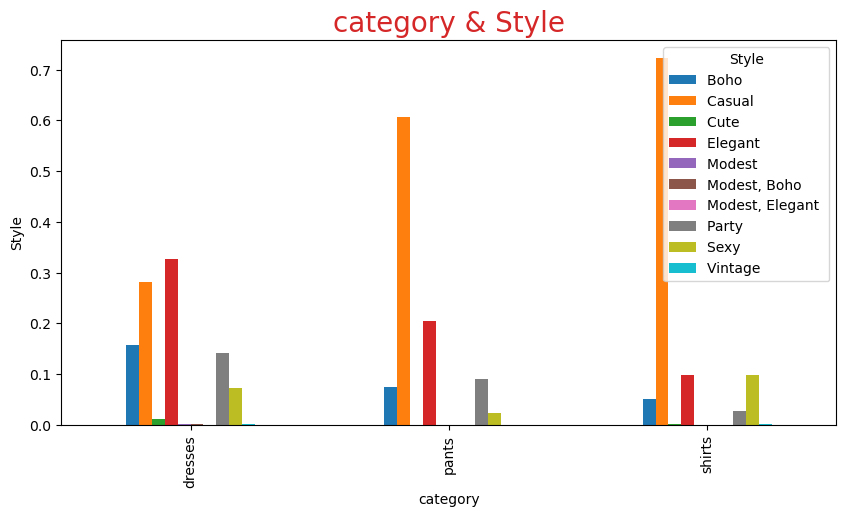

In [18]:
ct = pd.crosstab(shein_df['category'], shein_df['Style'],normalize = 'index')
ct.plot(kind='bar', figsize = (10,5))
plt.title('category & Style',fontsize = 20, color = '#d62728')
plt.xlabel('category')
plt.ylabel('Style')

In [19]:
#ct1 = pd.crosstab(shein_df['price'], shein_df['rating'])
#ct1.plot(kind='bar', figsize = (10,5))
#plt.title('price & rating',fontsize = 20, color = '#d62728')
#plt.xlabel('price')
#plt.ylabel('rating')

In [20]:
#shein_df.loc[shein_df['rating'] == 0, 'rating'] = shein_df.rating.mean()

In [21]:
shein_df.loc[shein_df['rating'] == 0, 'rating'] = np.nan

In [22]:
shein_df.rating.fillna(shein_df.rating.mean())

0       4.910000
1       4.900000
2       4.890000
3       4.940000
4       4.940000
          ...   
4420    4.570000
4421    4.720000
4422    4.950000
4423    4.950000
4424    4.875119
Name: rating, Length: 4425, dtype: float64

Text(0.5, 1.0, 'rating')

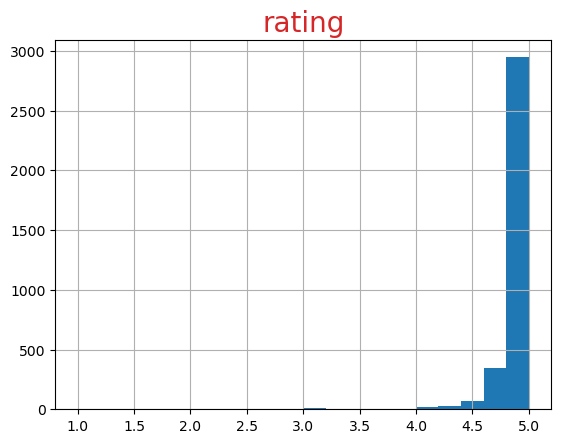

In [23]:
shein_df.rating.hist(bins=20)
plt.title('rating', fontsize = 20, color = '#d62728')

/Users/mayshviro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='Style'>

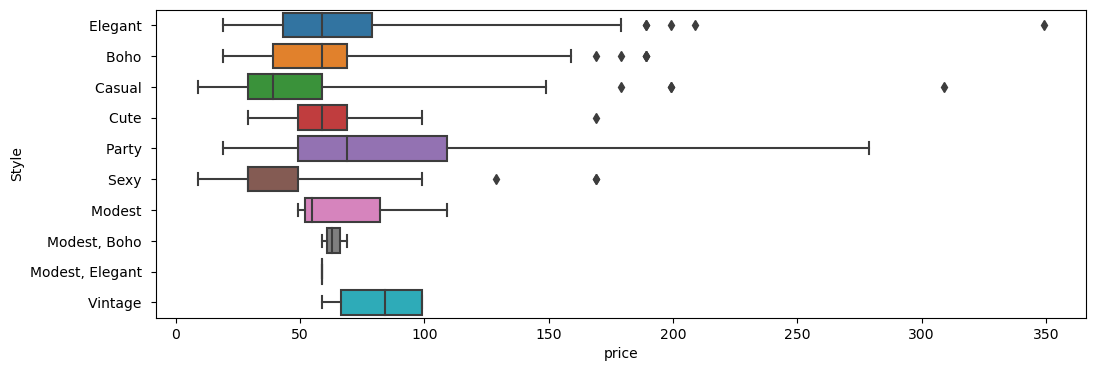

In [24]:
fig = plt.figure(figsize = (12,4))
sns.boxplot(shein_df.price,shein_df.Style,whis=3)

Text(0, 0.5, 'Price')

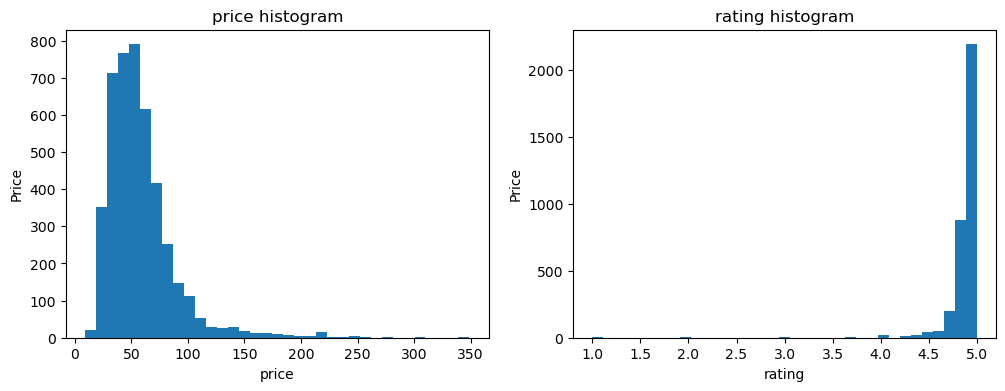

In [25]:
fig = plt.figure(figsize = (12,4))
fig1= fig.add_subplot(1,2,1)
fig2= fig.add_subplot(1,2,2)

fig1.hist(shein_df.price, bins=35)
fig1.set_title('price histogram')
fig1.set_xlabel('price')
fig1.set_ylabel('Price')

fig2.hist(shein_df.rating, bins=35)
fig2.set_title('rating histogram')
fig2.set_xlabel('rating')
fig2.set_ylabel('Price')

/Users/mayshviro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='Fabric'>

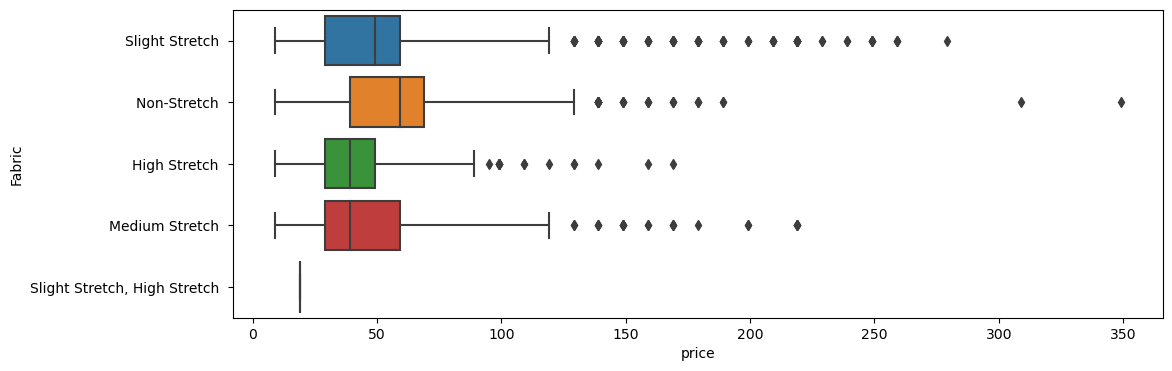

In [36]:
fig = plt.figure(figsize = (12,4))
sns.boxplot(shein_df.price, shein_df.Fabric,whis=2)

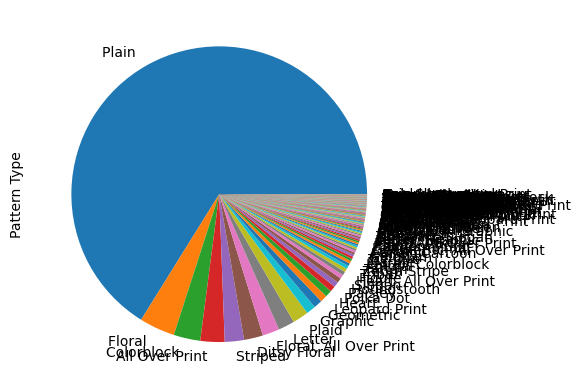

<Figure size 1200x400 with 0 Axes>

In [53]:
shein_df['Pattern Type'].value_counts().plot(kind= 'pie')
fig = plt.figure(figsize = (12,4))